In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

def csv_drive_path_generator(url:str):
 '''
 Help in read csv file directly from google drive.
 Make sure the csv format is standard.
 url:str - path to csv file example:
   url = 'https://drive.google.com/file/d/126JPZ3lYwdLyJ2d_7jxM9jMtZaOlF-Ld/view?usp=sharing'
 return : str
 '''
 path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
 return path

# Preliminaries

The chosen dataset for the following EDA project is "insurance.csv" (source: https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).
The dataset is dedicated to the cost of treatment of different patients billed by their health insurance. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice dataset analysis.

Columns:

- age: insurance contractor's age

- sex: insurance contractor's gender (female, male)

- bmi: body mass index

- children: number of children covered by health insurance / number of dependents

- smoker: does insurance contractor smoke or not

- region: insurance contractor's residential area in the US: northeast, southeast, northwest, southwest

- charges: individual medical costs billed by health insurance


# Read the data

In [ ]:
# path = csv_drive_path_generator(url = 'https://drive.google.com/file/d/1CyX59y4Of3esfF9nVPcx569uNf2AjCqv/view?usp=sharing')
# insurance_df = pd.read_csv(path)
# insurance_df.head()

In [ ]:
insurance_df = pd.read_csv("insurance.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print(f"The data frame has {insurance_df.shape[0]} rows and {insurance_df.shape[1]} columns.")

The data frame has 1338 rows and 7 columns.


# Data inspection

### General info

Let's have a general glance at our data.

pandas.DataFrame.info method gives us information regarding index dtype and columns, non-null values and memory usage.

In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the above we see there are 7 columns, there are no null values in the data. Age, bmi, children, charges columns have numeric datatype, and sex, smoker, region columns have object datatype.

### Number of distinct values for each column

In [ ]:
insurance_df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### Describe for all columns

In [ ]:
insurance_df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


# Pandas Profiling Report

In [ ]:
# !pip install pandas-profiling==2.7.1

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(insurance_df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Report summary
- 1 duplicate row
- no missing values
- 3 datatypes - number (age, bmi, children, charges), cat (sex, region), bool (smoker)
- males & females - approximately the same number
- age: mean ~39, std ~14
- bmi: seems to have normal distribution with mean ~30, std ~6
- the vast majority of observations are non-smokers (~80%)

# Data cleaning

### Removing duplicates

From the profiling report we found that there is 1 duplicate row. We keep the 2nd duplicate row from the data.

In [ ]:
insurance_df[insurance_df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
insurance_df.drop_duplicates(keep='last', inplace=True)

Making sure that only the last row is kept.

In [ ]:
insurance_df.loc[(insurance_df.age == 19) & (insurance_df.charges== 1639.5631)]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
insurance_df.groupby(['age', 'children']).count()

sex  bmi  smoker  region  charges
age children                                   
18  0          51   51      51      51       51
    1           9    9       9       9        9
    2           6    6       6       6        6
    3           2    2       2       2        2
    4           1    1       1       1        1
...           ...  ...     ...     ...      ...
63  3           3    3       3       3        3
64  0          13   13      13      13       13
    1           3    3       3       3        3
    2           4    4       4       4        4
    3           2    2       2       2        2

[219 rows x 5 columns]

We see that there is 1 person who is 18 years old and he has 4 children. For us all people aged 20 and less who have more than 2 children are outliers. We learn there might be more outliers like that, so we are going to check our data and remove them.


In [ ]:
insurance_df.loc[(insurance_df.age < 21) & (insurance_df.children > 2)]

,age,sex,bmi,children,smoker,region,charges
32,19,female,28.600,5,no,southwest,4687.79700
166,20,female,37.000,5,no,southwest,4830.63000
369,18,male,30.400,3,no,northeast,3481.86800
984,20,male,30.115,5,no,northeast,4915.05985
1095,18,female,31.350,4,no,northeast,4561.18850
1186,20,male,35.625,3,yes,northwest,37465.34375
1195,19,female,27.930,3,no,northwest,18838.70366
1204,18,female,27.280,3,yes,southeast,18223.45120


In [ ]:
insurance_df = insurance_df.loc[~((insurance_df.age < 21) & (insurance_df.children > 2))]

In [ ]:
#qa:
insurance_df.loc[(insurance_df.age < 21) & (insurance_df.children > 2)]

,age,sex,bmi,children,smoker,region,charges


In [ ]:
#data frame info after data cleaning:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1329 non-null   int64  
 1   sex       1329 non-null   object 
 2   bmi       1329 non-null   float64
 3   children  1329 non-null   int64  
 4   smoker    1329 non-null   object 
 5   region    1329 non-null   object 
 6   charges   1329 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.1+ KB


# Visualizations

### Single variables distribution

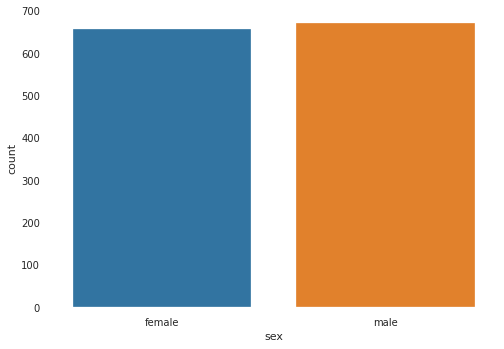

In [ ]:
sns.countplot(insurance_df['sex']);
plt.show()

There is almost equal number of males and females.

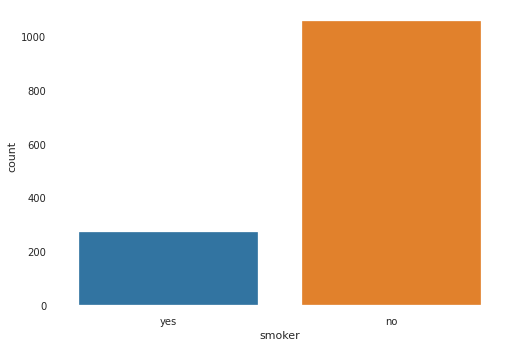

In [ ]:
sns.countplot(insurance_df['smoker']);
plt.show()

Most of the people are non-smokers.

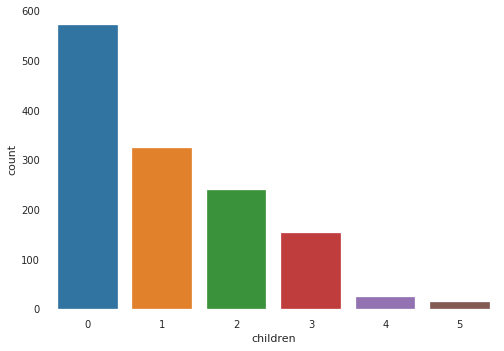

In [ ]:
sns.countplot(insurance_df['children'])
plt.show()

People have between 0 and 5 children. The tendency is to have less children than more children.

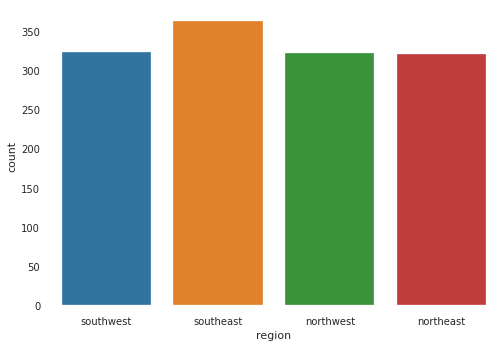

In [ ]:
sns.countplot(insurance_df['region'])
plt.show()

People are distributed almost equally between regions.

Note: during presenting visualizations, we discovered something weird in the children countplot - we didn't see all the data. This helped us to understand that we've made a mistake earlier during outliers filtering.

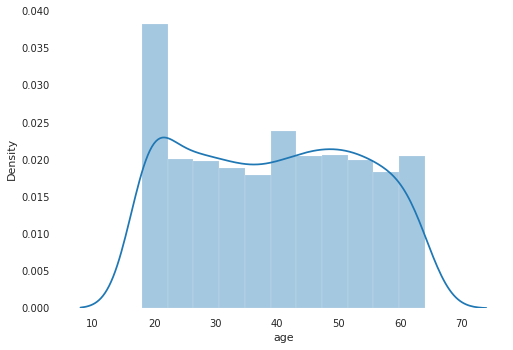

In [ ]:
sns.distplot(insurance_df['age'])
plt.show()

Looks like age has a uniform distribution type.

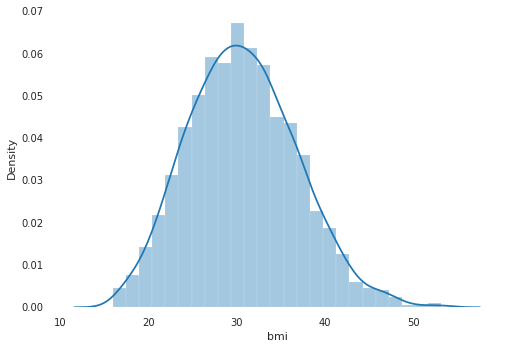

In [ ]:
sns.distplot(insurance_df['bmi'])
plt.show()

It seems that bmi is normally distributed.

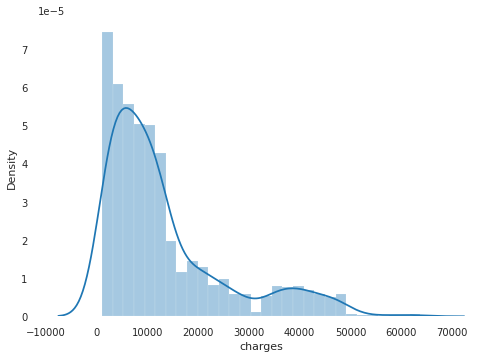

In [ ]:
sns.distplot(insurance_df['charges'])
plt.show()

Charges are positively skewed as long tail is at right side (mean>median).

### Correlation Matrix

In [ ]:
#class to encode and inverse a few categorical features at once
class MultiColumnLabelEncoder:

    def __init__(self, columns=None):
        self.columns = columns #array of column names to encode


    def fit(self, X, y=None):
        self.encoders = {}
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            self.encoders[col] = LabelEncoder().fit(X[col])
        return self


    def transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].transform(X[col])
        return output


    def fit_transform(self, X, y=None):
        return self.fit(X,y).transform(X)


    def inverse_transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].inverse_transform(X[col])
        return output

In [ ]:
#let's analyze the relationship between the data variables. First we need to encode categorical features.
from sklearn.preprocessing import LabelEncoder
multi = MultiColumnLabelEncoder(columns=['sex','smoker','region'])
insurance_df = multi.fit_transform(insurance_df)
insurance_df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


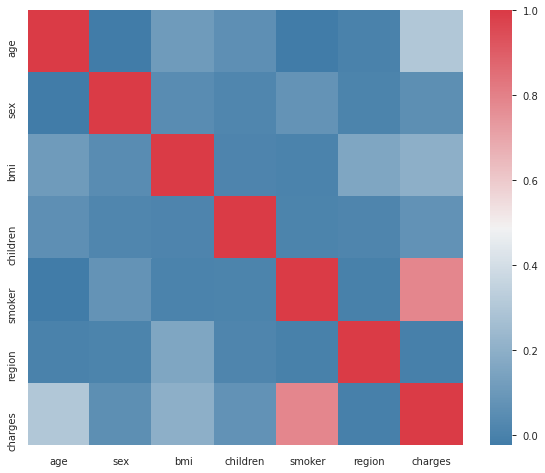

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = insurance_df.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax);

We see strong correlation between smoking and charges which is quite obvious. Age also seems to have a correlation with charges.
It's a bit strange that bmi doesn't seem to have a significant correlation with charges.
It would also be interesting to investigate bmi & region, and sex & smoker.

In [ ]:
#transform labels back to original encoding
insurance_df = multi.inverse_transform(insurance_df)
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Distribution of variables against others

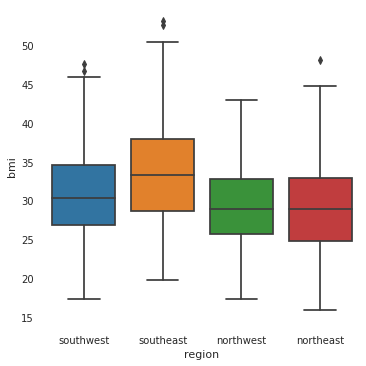

In [ ]:
#bmi & region
sns.catplot(x="region", y="bmi", kind="box", data=insurance_df)

In southeast bmi is bigger than in other regions. Let's investigate this region and see if the people who leave there get more medical charges:

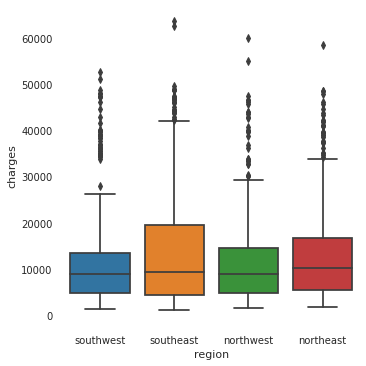

In [ ]:
#charges & region
sns.catplot(x="region", y="charges", kind="box", data=insurance_df)

In [ ]:
insurance_df.groupby(['region']).charges.mean()

region
northeast    13491.309866
northwest    12353.317969
southeast    14725.802513
southwest    12393.920188
Name: charges, dtype: float64

In [ ]:
insurance_df[~(insurance_df.region=='southeast')]['charges'].mean()

12745.046660050715

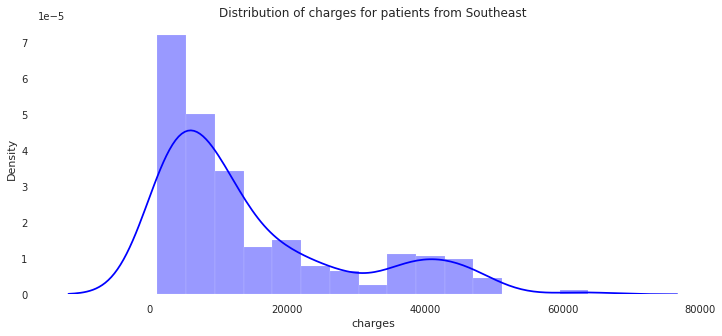

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients from Southeast")
ax = sns.distplot(insurance_df[(insurance_df.region=='southeast')]['charges'], color = 'b')

Indeed people from southeast get more charges on average than people from other regions (14735 vs 12722).

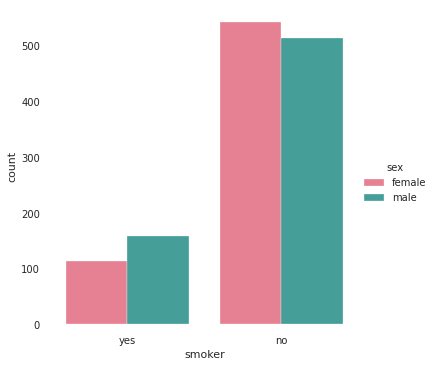

In [ ]:
#sex & smoker:
sns.catplot(x="smoker", kind="count", hue = 'sex', palette="husl", data=insurance_df)

There are more smokers among men than among women.

In [ ]:
#we wonder if there is a difference of number of smokers between regions
pd.crosstab(insurance_df['region'],insurance_df['smoker']) #normalize=True)

smoker,no,yes
region,,
northeast,254,67
northwest,265,57
southeast,273,90
southwest,265,58


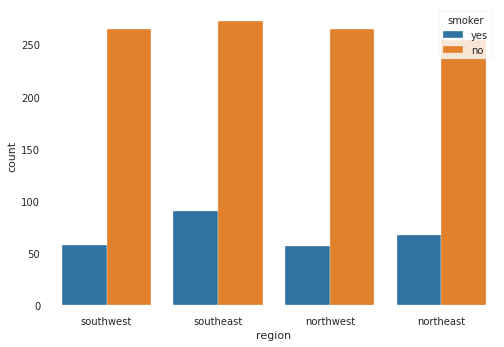

In [ ]:
#graphically display number of smokers by regions
sns.countplot(insurance_df['region'],hue=insurance_df['smoker'])
plt.show()

From the above we didn't find anything significant or interesting.

# Statistical Tests

We'll answer the following questions using T-test:
1. Does smoking influence charges?
2. Does number of children influence charges?
3. Does gender influence bmi?

We'll answer the following questions using Chi-square test:
4. Is there a difference in proportion of smokers in different genders?
5. Is there a difference in size of families in different regions?

## T-tests

For the following 3 questions we'll perform T-test because we observe two independent samples from the same or different population. A T-test requires two variables: one must be categorical and have exactly two levels (smoking, family size, gender), and the other must be quantitative and be estimable by a mean (charges, bmi).
If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

### 1. Does smoking influence charges?


- H0: Smoking doesn't influence charges
- H1: Smoking influence charges

In [ ]:
#creating 2 series - charges for smokers and charges for non-smokers
x = insurance_df[insurance_df['smoker'] == 'yes']['charges']
y = insurance_df[insurance_df['smoker'] == 'no']['charges']

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

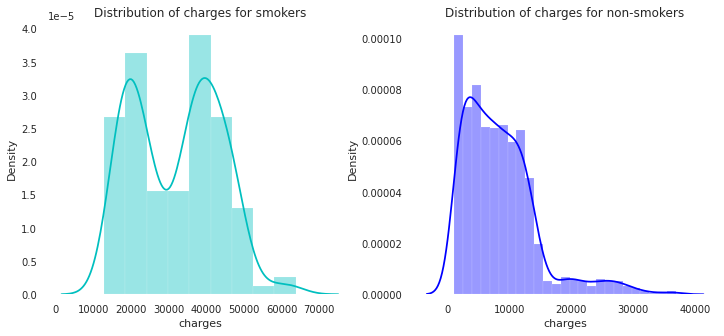

In [ ]:
f = plt.figure(figsize=(12,5))

ax = f.add_subplot(121)
sns.distplot(x,color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax = f.add_subplot(122)
sns.distplot(y,color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Text(0.5, 1.0, 'Box plot of charges for non-smokers')

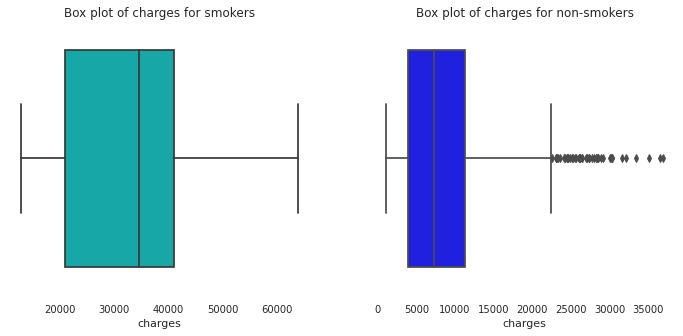

In [ ]:
f = plt.figure(figsize=(12,5))

ax = f.add_subplot(121)
sns.boxplot(x,color='c',ax=ax)
ax.set_title('Box plot of charges for smokers')

ax = f.add_subplot(122)
sns.boxplot(y,color='b',ax=ax)
ax.set_title('Box plot of charges for non-smokers')

Based on the above charts, smokers get significantly higher charges. Let's see whether the statistical test confirmes it.

In [ ]:
#T-test
t, p_value = stats.ttest_ind(x,y,axis=0)
if p_value > 0.05:
  print(f"p_value > 0.05 ({p_value}), therefore we stay with H0: smoking doesn't influence charges")
else:
  print(f"p_value <= 0.05 ({p_value}), therefore we reject H0 and accept H1: smoking influence charges")

p_value <= 0.05 (5.773088394805289e-281), therefore we reject H0 and accept H1: smoking influence charges


### 2. Does number of children influence charges?

- H0: Number of children doesn't influence charges
- H1: Number of children influence charges

The number of children is numeric, therefore we wish to transform it to boolean value (small vs large families) in order to perform t-test.

In [ ]:
#let's check the children's distribution
insurance_df['children'].value_counts() 

0    573
1    324
2    240
3    153
4     24
5     15
Name: children, dtype: int64

In [ ]:
insurance_df['is_large_family'] = insurance_df['children'] > 1
insurance_df['is_large_family']

0       False
1       False
2        True
3       False
4       False
        ...  
1333     True
1334    False
1335    False
1336    False
1337    False
Name: is_large_family, Length: 1329, dtype: bool

In [ ]:
insurance_df['is_large_family'].value_counts()

False    897
True     432
Name: is_large_family, dtype: int64

In [ ]:
#creating 2 Series - charges for large families and charges for small families
x = insurance_df[insurance_df['is_large_family'] == True]['charges']
y = insurance_df[insurance_df['is_large_family'] == False]['charges']

In [ ]:
#T-test
t, p_value = stats.ttest_ind(x,y,axis=0)
if p_value > 0.05:
  print(f"p_value > 0.05 ({p_value}), therefore we stay with H0: number of children doesn't influence charges")
else:
  print(f"p_value <= 0.05 ({p_value}), therefore we reject H0 and accept H1: number of children influences charges")

p_value <= 0.05 (0.0007487786386212014), therefore we reject H0 and accept H1: number of children influences charges


### 3. Does gender influence bmi?

- H0: Gender doesn't influence bmi
- H1: Gender influences bmi

In [ ]:
#creating 2 Series - bmi for males and bmi for females
x = insurance_df[insurance_df['sex'] == 'male']['bmi']
y = insurance_df[insurance_df['sex'] == 'female']['bmi']

In [ ]:
#T-test
t, p_value = stats.ttest_ind(x,y,axis=0)
if p_value > 0.05:
  print(f"p_value > 0.05 ({p_value}), therefore we stay with H0: gender doesn't influence bmi")
else:
  print(f"p_value <= 0.05 ({p_value}), therefore we reject H0 and accept H1: gender influences bmi")

p_value > 0.05 (0.09419144904453226), therefore we stay with H0: gender doesn't influence bmi


## Chi-square tests

For the following 2 questions we'll perform Chi-square test.
A chi-square test requires categorical variables, usually only two, but each may have any number of levels (smokers, gender, family size, coast).
Having calculated the chi square value and degree of freedom, we consult a chi-square table (or use python scipy function stats.chi2.ppf()) to check whether the chi square statistics exceeds the critical value
of the chi square distribution. If the statistics is larger than the critical value for alpha of 0.05 (95% confidence), we have sufficient evidence to reject the H0 (null hypothesis).

### 4. Is there a difference in proportion of smokers in different genders?

- H0: There is no difference in proportion of smokers in different genders
- H1: There is a difference in proportion of smokers in different genders

In [ ]:
cross_df = pd.crosstab(insurance_df['smoker'],insurance_df['sex'], margins=True, margins_name='Total')
cross_df

sex,female,male,Total
smoker,,,
no,543,514,1057
yes,114,158,272
Total,657,672,1329


#### Observed values

In [ ]:
O11 = cross_df.iloc[0,0]
O12 = cross_df.iloc[0,1]
O21 = cross_df.iloc[1,0]
O22 = cross_df.iloc[1,1]

print(f'Observed value of female non-smokers: {O11}')
print(f'Observed value of male non-smokers: {O12}')
print(f'Observed value of female smokers: {O21}')
print(f'Observed value of male smokers: {O22}')

Observed value of female non-smokers: 543
Observed value of male non-smokers: 514
Observed value of female smokers: 114
Observed value of male smokers: 158


#### Observed values - totals 

In [ ]:
total_population = cross_df.iloc[2,2]
total_non_smokers = cross_df.iloc[0,2]
total_smokers = cross_df.iloc[1,2]
total_females = cross_df.iloc[2,0]
total_males = cross_df.iloc[2,1]

print(f'total population: {total_population}')
print(f'total non smokers: {total_non_smokers}')
print(f'total smokers: {total_smokers}')
print(f'total females: {total_females}')
print(f'total males: {total_males}')

total population: 1329
total non smokers: 1057
total smokers: 272
total females: 657
total males: 672


#### Expected values

In [ ]:
#E11 = expected value of smoker=no and sex=female
#E12 = expected value of smoker=no and sex=male
#E21 = expected value of smoker=yes and sex=female
#E22 = expected value of smoker=yes and sex=male

E11 = total_non_smokers*(total_females/total_population)
print(f'expected value of female non-smokers is {E11}')

E12 = total_non_smokers*(total_males/total_population)
print(f'expected value of male non-smokers is {E12}')

E21 = total_smokers*(total_females/total_population)
print(f'expected value of female smokers is {E21}')

E22 = total_smokers*(total_males/total_population)
print(f'expected value of male smokers is {E22}')

#chi-square = summation((observed-expected)^2/expected)

chiE11 = np.square(O11-E11)/E11
print(f'chiE11 is {chiE11}')

chiE12 = np.square(O12-E12)/E12
print(f'chiE12 is {chiE12}')

chiE21 = np.square(O21-E21)/E21
print(f'chiE21 is {chiE21}')

chiE22 = np.square(O22-E22)/E22
print(f'chiE22 is {chiE22}')

chisquare = chiE11 + chiE12 + chiE21 + chiE22
print(f'chi-square value is {chisquare}')

expected value of female non-smokers is 522.5349887133183
expected value of male non-smokers is 534.4650112866817
expected value of female smokers is 134.46501128668172
expected value of male smokers is 137.53498871331828
chiE11 is 0.8015093649428098
chiE12 is 0.7836185309039078
chiE21 is 3.11468896597261
chiE22 is 3.0451646586964354
chi-square value is 7.744981520515763


#### Compute chi-square critical value

In [ ]:
alpha = 0.05
significance_level = 1 - alpha
deg_of_freedom = (2-1) * (2 -1)
chi2_critical_value = stats.chi2.ppf(significance_level, deg_of_freedom)

print(f'alpha is {alpha}, therefore significance level (confidence level) is {significance_level}')
print(f'degree of freedom is {deg_of_freedom}')
print(f'chi square critical value is {chi2_critical_value}')

if chisquare < chi2_critical_value:
    print(f'chi square value {chisquare} is smaller than critical value, therefore we stay with H0: there is no difference in proportion of smokers in different genders')
else:
    print(f'chi square value {chisquare} is larger than critical value, therefore we reject H0 and accept H1: there is a difference in proportion of smokers in different genders')

alpha is 0.05, therefore significance level (confidence level) is 0.95
degree of freedom is 1
chi square critical value is 3.841458820694124
chi square value 7.765921028604452 is larger than critical value, therefore we reject H0 and accept H1: there is a difference in proportions of smokers in different genders


### 5. Is there a difference in size of families in different regions (coasts)?

- H0: There is no difference in proportion of large families in different regions
- H1: There is a difference in proportion of large families in different regions

Note: There are 4 levels of 'region'. This means the crosstab table would be 4 rows by 2 columns. For simplicity sake
  we decided to transform 'region' to boolean value of 'is_west_coast' (North West and South West == True, North East and South East == False) in order to perform chi-squared test.

In [ ]:
insurance_df['region'].value_counts()

southeast    363
southwest    323
northwest    322
northeast    321
Name: region, dtype: int64

In [ ]:
insurance_df['is_west_coast'] = (insurance_df['region'] == 'northwest') | (insurance_df['region'] == 'southwest')
insurance_df['is_west_coast'].value_counts()

False    684
True     645
Name: is_west_coast, dtype: int64

In [ ]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,is_large_family,is_west_coast
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,False,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,False,True
4,32,male,28.880,0,no,northwest,3866.85520,False,True


In [ ]:
cross_df2 = pd.crosstab(insurance_df['is_large_family'], insurance_df['is_west_coast'], margins=True, margins_name='Total')
cross_df2

is_west_coast,False,True,Total
is_large_family,,,
False,476,421,897
True,208,224,432
Total,684,645,1329


#### Observed values

In [ ]:
O11 = cross_df2.iloc[0,0]
O12 = cross_df2.iloc[0,1]
O21 = cross_df2.iloc[1,0]
O22 = cross_df2.iloc[1,1]

print(f'Observed value of east-coast small-family : {O11}')
print(f'Observed value of west-coast small-family: {O12}')
print(f'Observed value of east-coast large-family: {O21}')
print(f'Observed value of west-coast large-family: {O22}')

Observed value of east-coast small-family : 476
Observed value of west-coast small-family: 421
Observed value of east-coast large-family: 208
Observed value of west-coast large-family: 224


#### Observed values - totals 

In [ ]:
total_population = cross_df2.iloc[2,2]
total_small_family = cross_df2.iloc[0,2]
total_large_family = cross_df2.iloc[1,2]
total_east_coast = cross_df2.iloc[2,0]
total_west_coast = cross_df2.iloc[2,1]

print(f'total population: {total_population}')
print(f'total small family: {total_small_family}')
print(f'total large family: {total_large_family}')
print(f'total east coast: {total_east_coast}')
print(f'total west coast: {total_west_coast}')

total population: 1329
total small family: 897
total large family: 432
total east coast: 684
total west coast: 645


#### Expected values

In [ ]:
#E11 = expected value of is_large_family=no and is_west_coast=no
#E12 = expected value of is_large_family=no and is_west_coast=yes
#E21 = expected value of is_large_family=yes and is_west_coast=no
#E22 = expected value of is_large_family=yes and is_west_coast=yes

E11 = total_small_family*(total_east_coast/total_population)
print(f'expected value of east coast small family is {E11}')

E12 = total_small_family*(total_west_coast/total_population)
print(f'expected value of west coast small family is {E12}')

E21 = total_large_family*(total_east_coast/total_population)
print(f'expected value of east coast large family is {E21}')

E22 = total_large_family*(total_west_coast/total_population)
print(f'expected value of west coast large family is {E22}')

#chi-square = summation((observed-expected)^2/expected)

chiE11 = np.square(O11-E11)/E11
print(f'chiE11 is {chiE11}')

chiE12 = np.square(O12-E12)/E12
print(f'chiE12 is {chiE12}')

chiE21 = np.square(O21-E21)/E21
print(f'chiE21 is {chiE21}')

chiE22 = np.square(O22-E22)/E22
print(f'chiE22 is {chiE22}')

chisquare = chiE11 + chiE12 + chiE21 + chiE22
print(f'chi-square value is {chisquare}')

expected value of east coast small family is 461.66139954853276
expected value of west coast small family is 435.33860045146724
expected value of east coast large family is 222.33860045146727
expected value of west coast large family is 209.66139954853273
chiE11 is 0.4453382134782597
chiE12 is 0.47226564033973595
chiE21 is 0.9246953182638903
chiE22 is 0.9806071282054278
chi-square value is 2.822906300287314


#### Compute chi-square critical value

In [ ]:
alpha = 0.05
significance_level = 1 - alpha
deg_of_freedom = (2-1) * (2 -1)
chi2_critical_value = stats.chi2.ppf(significance_level, deg_of_freedom)

print(f'alpha is {alpha}, therefore significance level (confidence level) is {significance_level}')
print(f'degree of freedom is {deg_of_freedom}')
print(f'chi square critical value is {chi2_critical_value}')

if chisquare < chi2_critical_value:
    print(f'chi square value {chisquare} is smaller than critical value, therefore we stay with H0: there is no difference in proportion of large families in different regions')
else:
    print(f'chi square value {chisquare} is larger than critical value, therefore we reject H0 and accept H1: there is a difference in proportion of large families in different regions')

alpha is 0.05, therefore significance level (confidence level) is 0.95
degree of freedom is 1
chi square critical value is 3.841458820694124
chi square value 2.822906300287314 is smaller than critical value, therefore we stay with H0: there is no difference in proportion of large families in different regions


# Conclusions

#### T-tests

1. Does smoking influence charges? Yes (reject H0) (smokers have increased charges)
2. Does number of children influence charges? Yes (reject H0) (larger famlilies have increased charges)
3. Does gender influence bmi? No (accept H0)

#### Chi-square tests

4. Is there a difference in proportion of smokers in different genders? Yes (reject H0) (males smoke more than females)
5. Is there a difference in size of families in different regions (coasts)? No (accept H0)

# Thank you for making it till here :) We hope you've enjoyed!